# Modal decomposition: find "normal" patterns of oscillating system

This TP is done by Chensheng Luo.

### Oscillation 
The **repetitive variation**, typically in time, of some measure **about a central value** (often a point of equilibrium) or between two or more different states.

The term ***vibration*** is precisely used to describe **mechanical oscillation**. Here some examples of impressive vibration phenomena:

### Tacoma Narrows Bridge: the "Galloping Gertie"
<img style='width: 600px; margin: 0px; float: left; border: 3px solid black;' src='images/tacoma-bridge.gif'/> 

### Molecular dynamics

Oscillations not only occur in mechanical systems but also in dynamic systems in virtually every area of science. For example, $CH_2$ group, commonly found in organic compounds, can vibrate in six different ways: symmetric and asymmetric stretching, scissoring, rocking, wagging and twisting as shown here:

<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Symmetrical_stretching.gif">
<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Asymmetrical_stretching.gif">
<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Scissoring.gif">
<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Wagging.gif">
<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Twisting.gif">
<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Rotation.gif">

## What is a"normal" mode?

A **normal mode** $\boldsymbol{u_n}$ of an oscillating system (bounded structure) is **mode is a standing state of excitation** defined by: 
+ **harmonic pattern** of motion
+ all parts move with the **same frequency** $f_n$ 
+ all parts move with a fixed phase relation

<img style='width: 400px; margin: 0px; float: left; border: 0px solid black;' src="images/natural-frequency.png">

<img style='width: 700px; margin: 0px; float: left; border: 0px solid black;' src="images/un-alpha.png">

## MDOF dynamics

See the theory in `MDOF_theory.pdf`

<img style='width: 800px; margin: 0px; float: left; border: 10px solid white;' src='images/mdof_scheme.png'> 

<img style='width: 700px; margin: 0px; float: left; border: 10px solid white;' src="images/mdof_eigen_eq.png"> 

# __Hands on session__

GRAPHS WITHOUT LEGENDS AND UNITS WILL NOT BE CONSIDERED!!

#### Setup

In [2]:
# Load fundamental modules
from math import sin
import numpy as np
from numpy.linalg import inv, norm
from scipy.linalg import eigh
from scipy.signal import find_peaks
from matplotlib import pyplot as plt

import cmath

In [3]:
# Set up properties
k = 100000. # stiffness
m = 1.0 # mass
dofs = 3 # number of dofs

# time vector
dt = 1.0e-2 # time step
dur = 60.0 # duration
vtm = np.arange(0.0,dur,dt) # time vector
ntm = vtm.size # number of time steps

# Compute the transfer function using the Fast Fourier Transform (use np.fft.rfft - https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

#### __[TASK #1] Compute Frequency Response Function__ [3/20 points]

Load the earthquake acceleration `seisme.txt` and the DOF displacements `q1.csv`, `q2.csv`, `q3.csv` referring to each DOF respectively. Each file contains two columns: the first one is the time vector, the second one the earthquake acceleration (for `seisme.txt`) and displacement (for `q1.csv`, `q2.csv`, `q3.csv`).

_Nota bene_: The `lambda` function is necessary to interpolate the external vectors on a generic time vector.

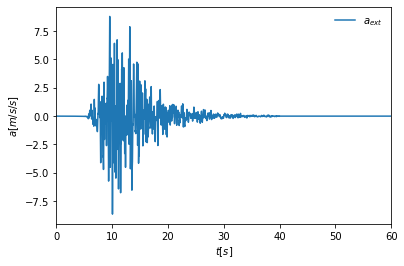

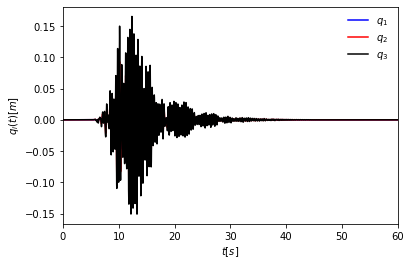

In [4]:
# earthquake input acceleration (inertial force)  [time (s),acceleration (m/s/s)]
eqk = np.loadtxt("seisme.txt")
aeq = lambda s: np.interp(s,eqk[:,0],eqk[:,1])
plt.ion()
plt.plot(vtm,aeq(vtm),label=r"$a_{ext}$")
plt.xlim(0.0,dur)
plt.xlabel(r'$t [s]$')
plt.ylabel(r'$a [m/s/s]$')
plt.legend(frameon=False)
plt.ioff()
plt.show()

# earthquake response q1 [time (s),displacement (m)]
eqk1 = np.genfromtxt("q1.csv",delimiter=',',dtype=np.float64)
q1 = lambda s: np.interp(s,eqk1[:,0],eqk1[:,1])

# earthquake response q2 [time (s),displacement (m)]
eqk2 = np.genfromtxt("q2.csv",delimiter=',',dtype=np.float64)
q2 = lambda s: np.interp(s,eqk2[:,0],eqk2[:,1])

# earthquake response q3 [time (s),displacement (m)]
eqk3 = np.genfromtxt("q3.csv",delimiter=',',dtype=np.float64)
q3 = lambda s: np.interp(s,eqk3[:,0],eqk3[:,1])

plt.ion()
plt.plot(vtm,q1(vtm),label=r'$q_1$',color='blue')
plt.plot(vtm,q2(vtm),label=r'$q_2$',color='red')
plt.plot(vtm,q3(vtm),label=r'$q_3$',color='black')
plt.xlim(0.0,dur)
plt.xlabel(r'$t [s]$')
plt.ylabel('$q_i(t) [m]$')
plt.legend(frameon=False)
plt.ioff()
plt.show()

* __[NEW!]__ Compute the $FRF$ (Frequency Response Function) for all the DOFs displacements separately ($FRF_1$ for $q_1$, $FRF_2$ for $q_2$ and $FRF_3$ for $q_3$) wrt the input ground motion $a_{eq}(t)$

Answer:

In [5]:
# Compute the Frequency Response Function using the Fast Fourier Transform (use np.fft.rfft - https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
nfft = next_power_of_2(vtm.size)
dfq = 1/(dt*nfft)# Number of samples
vfq = np.arange(nfft/2+1)*dfq# List of frequency

# Fourier Transform of input signal(earthquake) and output signal
Inp = np.fft.rfft(aeq(vtm),nfft)
Out1 = np.fft.rfft(q1(vtm),nfft)
Out2 = np.fft.rfft(q2(vtm),nfft)
Out3 = np.fft.rfft(q3(vtm),nfft)

FRF1 = Out1/(Inp+1.0e-10)
FRF2 = Out2/(Inp+1.0e-10)
FRF3 = Out3/(Inp+1.0e-10)

fqs, _ = find_peaks(abs(FRF1),prominence=0.001)
f1=fqs[0]-1
f2=fqs[1]-1
f3=fqs[2]-1


* Plot the $FRF$s amplitude and identify the first three peaks (plot them on the figure): at which frequencies do those peaks correspond to?

Answer:

The first peak takes place at the frequency of f1= 2.73 Hz
The second peak takes place at the frequency of f2= 5.74 Hz
The third peak takes place at the frequency of f3= 8.09 Hz


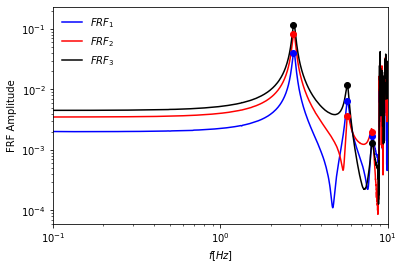

In [6]:
# Plot the FRFs amplitude
plt.loglog(vfq,abs(FRF1),label=r'$FRF_1$',color='blue')
plt.loglog(vfq,abs(FRF2),label=r'$FRF_2$',color='red')
plt.loglog(vfq,abs(FRF3),label=r'$FRF_3$',color='black')
plt.xlim(1e-1,10)
plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'FRF Amplitude')
plt.legend(frameon=False)
plt.ioff()

# Plot the peaks, the index of 3 pics is counted by hand
print('The first peak takes place at the frequency of f1=',round(vfq[f1],2),'Hz')
plt.loglog(vfq[f1], abs(FRF1[f1]),'o',color='blue')
plt.loglog(vfq[f1], abs(FRF2[f1]),'o',color='red')
plt.loglog(vfq[f1], abs(FRF3[f1]),'o',color='black')
print('The second peak takes place at the frequency of f2=',round(vfq[f2],2),'Hz')
plt.loglog(vfq[f2], abs(FRF1[f2]),'o',color='blue')
plt.loglog(vfq[f2], abs(FRF2[f2]),'o',color='red')
plt.loglog(vfq[f2], abs(FRF3[f2]),'o',color='black')
print('The third peak takes place at the frequency of f3=',round(vfq[f3],2),'Hz')
plt.loglog(vfq[f3], abs(FRF1[f3]),'o',color='blue')
plt.loglog(vfq[f3], abs(FRF2[f3]),'o',color='red')
plt.loglog(vfq[f3], abs(FRF3[f3]),'o',color='black')
plt.show()

* Plot the $FRF$s phase and identify the frequencies corresponding to the peaks fo the amplitude. What do you observe at these frequencies?

Answer:

At f1= 2.73 Hz, we have 3 phases are respectively 0.61 pi, 0.61 ,pi 0.6 pi.
At f2= 5.74 Hz, we have 3 phases are respectively 0.52 pi, 0.43 ,pi -0.43 pi.
At f3= 8.09 Hz, we have 3 phases are respectively 0.35 pi, -0.47 ,pi 0.4 pi.


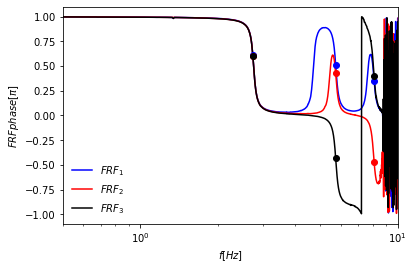

In [7]:
# Plot the FRFs phase
phase1=np.array([cmath.phase(i) for i in FRF1])
phase2=np.array([cmath.phase(i) for i in FRF2])
phase3=np.array([cmath.phase(i) for i in FRF3])
plt.xlim(5e-1,10)
plt.semilogx(vfq,phase1/np.pi,label=r'$FRF_1$',color='blue')
plt.semilogx(vfq,phase2/np.pi,label=r'$FRF_2$',color='red')
plt.semilogx(vfq,phase3/np.pi,label=r'$FRF_3$',color='black')
plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'$FRF phase[\pi]$')
plt.legend(frameon=False)
plt.ioff()

# Plot the peaks, and calculate the correspinding phase.
print('At f1=',round(vfq[f1],2),'Hz, we have 3 phases are respectively', round(phase1[f1]/np.pi,2),'pi,',round(phase2[f1]/np.pi,2),',pi',round(phase3[f1]/np.pi,2),'pi.')
plt.semilogx(vfq[f1], phase1[f1]/np.pi,'o',color='blue')
plt.semilogx(vfq[f1], phase2[f1]/np.pi,'o',color='red')
plt.semilogx(vfq[f1], phase3[f1]/np.pi,'o',color='black')

print('At f2=',round(vfq[f2],2),'Hz, we have 3 phases are respectively', round(phase1[f2]/np.pi,2),'pi,',round(phase2[f2]/np.pi,2),',pi',round(phase3[f2]/np.pi,2),'pi.')
plt.semilogx(vfq[f2], phase1[f2]/np.pi,'o',color='blue')
plt.semilogx(vfq[f2], phase2[f2]/np.pi,'o',color='red')
plt.semilogx(vfq[f2], phase3[f2]/np.pi,'o',color='black')

print('At f3=',round(vfq[f3],2),'Hz, we have 3 phases are respectively', round(phase1[f3]/np.pi,2),'pi,',round(phase2[f3]/np.pi,2),',pi',round(phase3[f3]/np.pi,2),'pi.')
plt.semilogx(vfq[f3], phase1[f3]/np.pi,'o',color='blue')
plt.semilogx(vfq[f3], phase2[f3]/np.pi,'o',color='red')
plt.semilogx(vfq[f3], phase3[f3]/np.pi,'o',color='black')

**Answer-Explanation:** We can see that, at the peak of each frequency, the correspoding phase are about $\frac{n}{2} \pi$.

* Can you relate the peak corresponding to the lowest frequency to the number of DOFs?

Answer:

In [8]:
f1_theory=10/dofs
print('In theory, first pic take place at the frequency of f1t=',round(f1_theory,2),'Hz')
print('In our calculate, it takes place at f1=',round(vfq[f1],2),'Hz')
print('We can find a coincidence between this two frequencies.')

In theory, first pic take place at the frequency of f1t= 3.33 Hz
In our calculate, it takes place at f1= 2.73 Hz
We can find a coincidence between this two frequencies.


#### MDOF

In this section, the MDOF system is analyzed

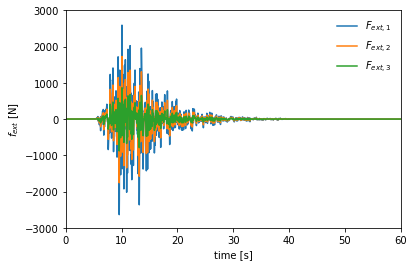

In [9]:
# Mass matrix
m1 = 300.*m
m2 = 200.*m
m3 = 100.*m
M = np.array([[m1,0,0],[0,m2,0],[0,0,m3]])

# Stiffness matrix
k1 = 3.*k
k2 = 2.*k
k3 = 1.*k
K = np.array([[k1+k2,-k2,0],[-k2,k2+k3,-k3],[0,-k3,k3]])

# External force
Fext = lambda s: np.tensordot(M@np.ones((3,)),-aeq(s),axes=0)

plt.ion()
plt.plot(vtm,Fext(vtm)[0,:],label=r'$F_{ext,1}$')
plt.plot(vtm,Fext(vtm)[1,:],label=r'$F_{ext,2}$')
plt.plot(vtm,Fext(vtm)[2,:],label=r'$F_{ext,3}$')
plt.xlim(0.0,dur)
plt.xlabel('time [s]')
plt.ylim(-3000.0,3000.0)
plt.ylabel('$f_{ext}$ [N]')
plt.legend(frameon=False)
plt.ioff()
plt.show()

#### __[TASK #2] Find eigen-modes__  [3/20 points]

* Find the eigen modes of the dynamic system. What are the natural frequencies?

Answer:

In [10]:
# find natural frequencies and mode shapes (https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html)
# Hint: call evecs and evals the eigen-vectors and eigen-values respectively. Compute natural frequencies

[evals,evecs]=eigh(K,M)
evecs=evecs.T
frequencies=np.sqrt(evals)/2/np.pi # Change to frequency
#evecs=np.array([evecs[i]/norm(evecs[i]) for i in range(3)]) # Normalize eigen vectors

print('f1 = {0} Hz, f2 = {1} Hz, f3 = {2} Hz '.format(*tuple(frequencies.round(2).tolist())))
print('l1 = {0}, l2 = {1}, l3 = {2} '.format(*tuple(evecs.round(2).tolist())))

f1 = 2.75 Hz, f2 = 5.75 Hz, f3 = 8.06 Hz 
l1 = [-0.02, -0.05, -0.07], l2 = [0.04, 0.02, -0.07], l3 = [-0.04, 0.05, -0.03] 


* Plot the eigen vectors of the system. At what do they correspond to?

Answer:

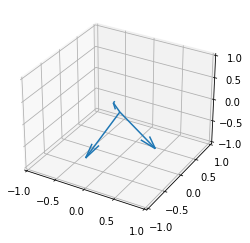

In [11]:
U, V, W = zip(*evecs)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver([0,0,0],[0,0,0], [0,0,0], U, V, W, normalize=True)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()

* Compute the _modal masses_ analytically and numerically:

*Nota bene*: the `scipy` function `eigh` normalizes the eigenvector as:

$$              \boldsymbol{K} . \boldsymbol{\phi}_n = ω^2 \cdot \boldsymbol{M} . \boldsymbol{\phi}_n$$

The corresponding `python` code:

```
              K @ vi = λ * M @ vi
```
with:

$$\lambda = \omega_i^2$$

$$\boldsymbol{\phi}_n^T . \boldsymbol{K} . \boldsymbol{\phi}_n = \omega_n^2$$
$$\boldsymbol{\phi}_n^T . \boldsymbol{M} . \boldsymbol{\phi}_n = 1$$

Answer: If we just consider the definition, it's supposed to be 1kg.

In [12]:
# Compute modal Masses
mM = [evecs[i].conj().T @ M @ evecs[i] for i in range(3)]
print("Modal mass 1: {:>.2f} kg".format(mM[0]))
print("Modal mass 2: {:>.2f} kg".format(mM[1]))
print("Modal mass 3: {:>.2f} kg".format(mM[2]))

Modal mass 1: 1.00 kg
Modal mass 2: 1.00 kg
Modal mass 3: 1.00 kg


* How many modes do you need to reconstruct the system response with at least 80\% of the total mass? Which ones?

Answer: 

In [13]:
normevecs=np.linalg.inv(np.diag(np.linalg.norm(evecs,axis=0))) 
factors=[normevecs[i][i]**2 for i in range(3)]# Participation factors

mt = factors[0]+factors[1]+factors[2] # Total mass
print("Total Mass 1: {:>.2f} kg".format(mt))

print("Percentage of Total Mass 1: {:>.2f} %".format(100*factors[0]/mt))
print("Percentage of Total Mass 2: {:>.2f} %".format(100*factors[1]/mt))
print("Percentage of Total Mass 3: {:>.2f} %".format(100*factors[2]/mt))

Total Mass 1: 600.00 kg
Percentage of Total Mass 1: 50.00 %
Percentage of Total Mass 2: 33.33 %
Percentage of Total Mass 3: 16.67 %


**Answer-Explanation:** We should take the first 2 modes to reconstruct the system response with at least 80% of the total mass.

#### __[TASK #3] Reconstruct the modal response__  [3/20 points]

* Solve the SDOF problem for each eigen-mode, in order to find the modal amplitudes $\alpha_n(t)$ (consider a critical damping $\xi$=2%)

_Nota Bene_:

The second order equation $y''(t)= a y'(t)+ b y(t) + c(t)$ can be rewritten as a system:

(1)   $y'(t) = z(t)$

(2)   $z'(t) = a z(t) + b y(t) + c(t)$

In this case, $a=0$ and $b=-\boldsymbol{M^{-1}.K}$.

The final first-order ordinary differential system of equations reads: 

$$\boldsymbol{X}'(t)=\boldsymbol{A.X(t)}+\boldsymbol{b}(t)$$

with $X(t)=\begin{bmatrix} \boldsymbol{q}(t)\\ \boldsymbol{q}'(t) \end{bmatrix}$ and $A=\begin{bmatrix} \boldsymbol{0} & \boldsymbol{I} \\  -\boldsymbol{M^{-1}.K} & \boldsymbol{0} \end{bmatrix}$ and with $\boldsymbol{b}(t)=\begin{bmatrix}0 \\ c(t)\end{bmatrix}$

Answer:

In [14]:
# Hint: use the scipy function solve_ivp (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
from scipy.integrate import solve_ivp

# Initial conditions
y0 = np.zeros((1,))
z0 = np.zeros((1,))
X0 = np.concatenate([y0,z0])

def solve2ndOrderODE(t,X,n,xi):
    # with extra arguments:
    # n = number of mode, begins with 0
    # xi = damping coefficient
    phin = evecs[n] # n-th eigen mode
    mn = mM[n] # n-th modal mass
    omegan = np.sqrt(phin.T @ K @ phin/mn) # n-th natural pulsation
    fn = lambda s: Fext(s) @ phin # project external force on the eigen mode
    return np.array([X[1],-omegan**2*X[0]-2*xi*omegan*X[1]+fn(t)/mn]) # return [y(t),z(t)]

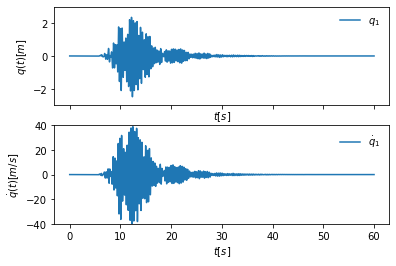

In [15]:
alpha1 = solve_ivp(solve2ndOrderODE,(0,dur),X0,t_eval=vtm,args=(0,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha1.y[0,:])
axs[0].legend([r'$q_1$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')
axs[0].set_ylim(-3.0,3.0)

axs[1].plot(alpha1.t,alpha1.y[1,:])
axs[1].legend([r'$\dot{q}_1$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')
axs[1].set_ylim(-40.0,40.0)

plt.ioff()

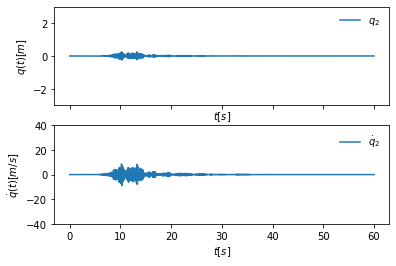

In [16]:
alpha2 = solve_ivp(solve2ndOrderODE,(0,dur),X0,t_eval=vtm,args=(1,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha2.y[0,:])
axs[0].legend([r'$q_2$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')
axs[0].set_ylim(-3.0,3.0)


axs[1].plot(alpha1.t,alpha2.y[1,:])
axs[1].legend([r'$\dot{q}_2$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')
axs[1].set_ylim(-40.0,40.0)

plt.ioff()

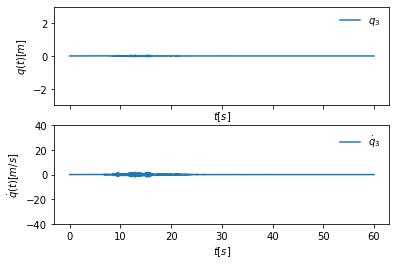

In [17]:
alpha3 = solve_ivp(solve2ndOrderODE,(0,dur),X0,t_eval=vtm,args=(2,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha3.y[0,:])
axs[0].legend([r'$q_3$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')
axs[0].set_ylim(-3.0,3.0)

axs[1].plot(alpha1.t,alpha3.y[1,:])
axs[1].legend([r'$\dot{q}_3$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')
axs[1].set_ylim(-40.0,40.0)

plt.ioff()

* __[NEW!]__ Compute and plot the total response based on the $\alpha_n(t)$ ahd $\boldsymbol{\phi}_n$ values

Answer:

In [18]:
# Displacement
u = np.einsum('i,j',evecs[0],alpha1.y[0,:])+np.einsum('i,j',evecs[1],alpha2.y[0,:])+np.einsum('i,j',evecs[2],alpha3.y[0,:])
# Velocity
v = np.einsum('i,j',evecs[0],alpha1.y[1,:])+np.einsum('i,j',evecs[1],alpha2.y[1,:])+np.einsum('i,j',evecs[2],alpha3.y[1,:])

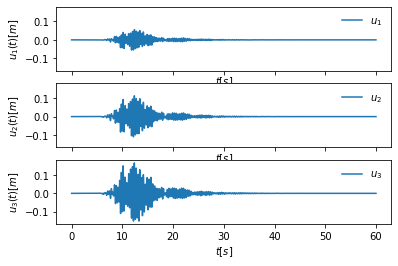

In [19]:
plt.ion()

fig,axs = plt.subplots(3,1,sharex=True,sharey=True)
axs[0].plot(alpha1.t,u[0,:])
axs[0].legend([r'$u_1$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$u_1(t) [m]$')

axs[1].plot(alpha2.t,u[1,:])
axs[1].legend([r'$u_2$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$u_2(t) [m]$')

axs[2].plot(alpha3.t,u[2,:])
axs[2].legend([r'$u_3$',],frameon=False)
axs[2].set_xlabel(r'$t [s]$')
axs[2].set_ylabel(r'$u_3(t) [m]$')

plt.ioff()

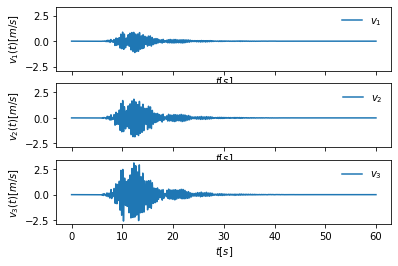

In [20]:
plt.ion()

fig,axs = plt.subplots(3,1,sharex=True,sharey=True)
axs[0].plot(alpha1.t,v[0,:])
axs[0].legend([r'$v_1$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$v_1(t) [m/s]$')

axs[1].plot(alpha2.t,v[1,:])
axs[1].legend([r'$v_2$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$v_2(t) [m/s]$')

axs[2].plot(alpha3.t,v[2,:])
axs[2].legend([r'$v_3$',],frameon=False)
axs[2].set_xlabel(r'$t [s]$')
axs[2].set_ylabel(r'$v_3(t) [m/s]$')

plt.ioff()

* __[NEW!]__ Compute and plot the _response spectrum_ for each modal amplitude $\alpha_i$:

$$S_d(\alpha_i)=\max_{t}\vert \alpha_i(t)\vert$$

and plot the values as a function of the associated natural frequency.

Answer:

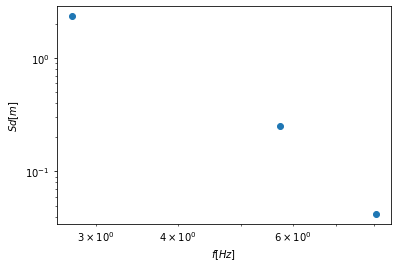

In [21]:
Sd1=max(alpha1.y[0])
Sd2=max(alpha2.y[0])
Sd3=max(alpha3.y[0])

plt.ion()
plt.scatter(frequencies,[Sd1,Sd2,Sd3])

plt.xlabel(r'$f [Hz]$')
plt.ylabel(r'$Sd [m]$')
plt.xscale('log')
plt.yscale('log')

Which mode dominates the transient response and why?

Answer:

As we can see, the 1st mode dominates the transient response. It's responable as the modal mass of this mode is smallest and the stiffness of this mode is the biggest. As a result, the corresponding $\omega_n$ is the smallest, thus the result has a highest amplitude.

#### __[TASK #4] Compute transfer function__  [3/20 points]

For each mode, the transfer function $\hat{H}_n(\omega)$ reads:

$$\hat{\boldsymbol{H}}(\omega)=\sum_n H_n(\omega)\boldsymbol{\phi}_n\otimes\boldsymbol{\phi}_n$$

* __[NEW!]__ Compute the transfer function of the whole MDOF

Answer: 

In [22]:
# Compute the transfer function using the Fast Fourier Transform (use np.fft.rfft - https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
noise_tolerance=10000
def computeTF(sol,n,xi):
    nfft = next_power_of_2(vtm.size)
    dfq = 1/(dt*nfft)# Number of samples
    vfq = np.arange(nfft/2+1)*dfq# List of frequency

    # Fourier Transform of input signal and output signal
    Inp = np.fft.rfft(np.dot([Fext(t) for t in vtm],evecs[n]),nfft)
    Out = np.fft.rfft(sol.y[0],nfft)
    H=Out/(Inp+1e-10)
    
    # To filte the noise of fourier transform
    H[0]=H[1]
    for i in range(1,H.shape[0]):
        if np.abs(H[i]/H[i-1])>noise_tolerance:
            H[i]=H[i-1]
    return vfq,H

vfq1,H1 = computeTF(alpha1,0,0.02)
vfq2,H2 = computeTF(alpha2,1,0.02)
vfq3,H3 = computeTF(alpha3,2,0.02)

# norm of eigen vectors
normevecs = np.linalg.inv(np.diag(np.linalg.norm(evecs,axis=0)))

# Hint: https://numpy.org/doc/stable/reference/generated/numpy.einsum.html?highlight=einsum#numpy.einsum
# Transfer function H
H = np.einsum('i,j,k',H1,evecs[0],evecs[0])+np.einsum('i,j,k',H2,evecs[1],evecs[1])+np.einsum('i,j,k',H3,evecs[2],evecs[2])
print('H , which is an array of matrix,is as follows:')
print(H)

# Fourier's spectrum H1*phi1+H2*phi2+H3*phi3
U = np.einsum('i,j',evecs[0],H1)+np.einsum('i,j',evecs[1],H2)+np.einsum('i,j',evecs[2],H3)

H , which is an array of matrix,is as follows:
[[[ 3.11302595e-06+2.65590911e-07j  2.90886954e-06+5.06758514e-07j
    2.83841894e-06+6.16235317e-07j]
  [ 2.90886954e-06+5.06758514e-07j  7.52557050e-06+9.87252483e-07j
    7.20172324e-06+1.37637309e-06j]
  [ 2.83841894e-06+6.16235317e-07j  7.20172324e-06+1.37637309e-06j
    1.65760264e-05+2.11840742e-06j]]

 [[ 3.11302595e-06+2.65590911e-07j  2.90886954e-06+5.06758514e-07j
    2.83841894e-06+6.16235317e-07j]
  [ 2.90886954e-06+5.06758514e-07j  7.52557050e-06+9.87252483e-07j
    7.20172324e-06+1.37637309e-06j]
  [ 2.83841894e-06+6.16235317e-07j  7.20172324e-06+1.37637309e-06j
    1.65760264e-05+2.11840742e-06j]]

 [[ 3.10796905e-06-1.37077520e-07j  2.94814866e-06-3.27051406e-07j
    2.86302951e-06-3.83025564e-07j]
  [ 2.94814866e-06-3.27051406e-07j  7.54626287e-06-5.74648304e-07j
    7.28525251e-06-8.73602673e-07j]
  [ 2.86302951e-06-3.83025564e-07j  7.28525251e-06-8.73602673e-07j
    1.66517192e-05-1.25684815e-06j]]

 ...

 [[-6.01263251

* Plot the response `U` and the eigen-frequencies previously identified. What do you observe?

Answer:

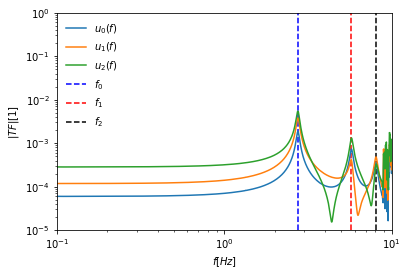

In [23]:
plt.ion()
plt.loglog(vfq,abs(U.T))
plt.vlines(np.sqrt(evals[0])/2.0/np.pi,0.00001,1.0,color='blue',linestyle='--')
plt.vlines(np.sqrt(evals[1])/2.0/np.pi,0.00001,1.0,color='red',linestyle='--')
plt.vlines(np.sqrt(evals[2])/2.0/np.pi,0.00001,1.0,color='black',linestyle='--')
plt.xlabel(r'$f [Hz]$')
plt.xlim([0.1,10.0])
plt.ylim([0.00001,1.0])
plt.ylabel(r'$\vert TF\vert [1]$')
plt.legend([r'$u_{{{:d}}}(f)$'.format(m) for m in range(3)]+[r'$f_{{{:d}}}$'.format(m) for m in range(3)],frameon=False,loc='upper left')
plt.ioff()

Explanation:   
We can observe that the peak of $U$ corresponses to the eigen-frequencies observed. It's quite natural as resonances take place at its natural frequencies.

#### __[TASK #5] Response to a random load (wind)__  [5/20 points]

We study the main characteristics of the wind loading. The horizontal velocity of the wind is modeled here in the following way:

$$V(t) = \mu_V+\beta(t)$$

where $\beta(t)$ is a centered gaussian random process, with a given Power Spectral Density $S_V(f)$ (with $f$ being the frequency, in Hz), and $\mu_V$ = 100 km/h. The velocity field is therefore random and $S_V(f)$ reads:

$$ S_V(f) = \frac{4\kappa\cdot \mu_V\cdot L}{\left(2+\left(\frac{L\cdot f}{\mu_V} \right)^2\right)^{\frac{5}{6}} }$$

with $\kappa$ and $L$ two constants.

* Plot the spectrum $S_V(f)$ as a function of $f$ (both phase and amplitude!). What are the mathematical properties of this Power Spectral Density?

_Nota Bene_: use the frequency vector employed in the previous steps, considering the time vector `vtm` as time domain of reference.

Answer:

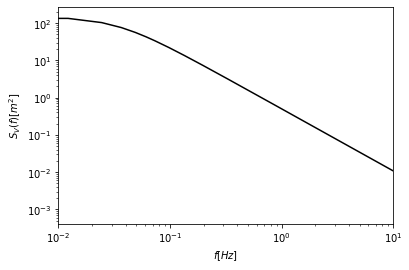

In [24]:
muV = 1.0e5/3600.0 # mean velocity at 10m height: 100 km/h
kappa = 0.002 # constant
Lcar = 1200.0 # constant

nfft = next_power_of_2(vtm.size)
dfq = 1/(dt*nfft)# Number of samples
vfq = np.arange(nfft/2+1)*dfq# List of frequency

Sv = lambda f: 4*kappa*muV*Lcar/pow(2+pow(Lcar*f/muV,2),5/6)

plt.ion()
plt.loglog(vfq,Sv(vfq),color='black')
plt.xlim(0.01,10.0)
plt.xlabel(r'$f [Hz]$')
plt.ylabel(r'$S_V(f) [m^2]$')
plt.ioff()

In order to generate a plausible realization of the wind velocity field $\beta_j(t)$, the following formula is adopted:

$$ \beta_j(t) = 2\cdot\sqrt{\frac{2}{\pi}}\cdot \sum_{k=1}^{N_f} \sqrt{2\cdot\pi\cdot S(f_k)\cdot \Delta f }\cdot \rho_{jk} \cdot\cos\left( 2\pi f_k t -2\pi\phi_{jk}\right)$$

with:
 - $\Delta f$ : frequency step
 - $N_f$: number of frequency points 
 - $\rho_{jk}=\vert a_{jk}+i\cdot b_{jk} \vert$: $j^{\text{th}}$-realization of the random vector $\boldsymbol{\rho}$ with $a_{jk}\sim\mathcal{N}(0,1)$ and $b_{jk}\sim\mathcal{N}(0,1)$
 - $\phi_{jk}$: $j^{\text{th}}$-realization of the random vector $\boldsymbol{\phi}$ with $\phi_{jk}\sim\mathcal{U}(0,1)$

* Generate $N_s$ samples of wind velocity field

Answer: (*Remark: this answer is done before the new version is given, thus the hint isn't used*)

In [25]:
# Hint: Use the numpy random number generator https://numpy.org/doc/stable/reference/random/index.html
from numpy.random import default_rng
rng = default_rng()

Ns = 10 # number of wind samples

beta_realizations=np.empty(shape=(0,len(vtm)),dtype=float)
for i in range(Ns):
    somme = np.zeros((len(vtm),),dtype=float)
    for k in range(1,(int)(nfft/2+1)):
        rho=abs(complex(np.random.default_rng().normal(0, 1, 1), np.random.default_rng().normal(0, 1, 1)))
        phi=np.random.default_rng().uniform(0, 1, 1)
        somme = np.sqrt(2*np.pi*Sv(vfq[k])*dfq)*rho*np.cos(2*np.pi*vfq[k]*vtm-2*np.pi*phi)+somme
    betaj=2*np.sqrt(2/np.pi)*somme
    beta_realizations=np.append(beta_realizations,[betaj],axis=0)
    
Ebeta = np.mean(beta_realizations,0)

* Plot the $N_s$ realizations on a single graph

Answer:

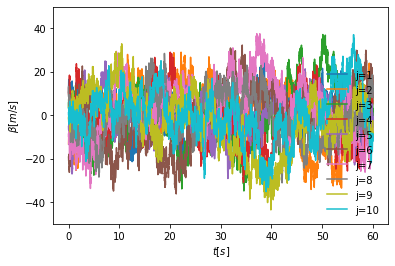

In [26]:
for i in range(Ns):
    plt.plot(vtm,beta_realizations[i],label='j='+str(i+1))
plt.xlabel(r'$t[s]$')
plt.ylabel(r'$\beta[m/s]$')
plt.ylim(-50,50)
plt.legend(frameon=False)
plt.show()

* Compute and plot the Fourier's transform of each realization and plot them on a single graph

Answer:

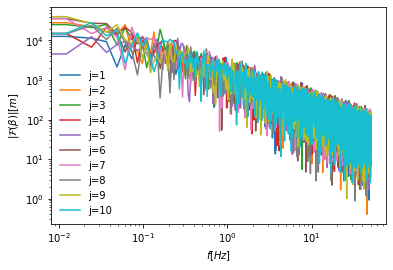

In [27]:
for i in range(Ns):
    ft=np.fft.rfft(beta_realizations[i],nfft)
    plt.loglog(vfq,abs(ft),label='j='+str(i+1))
plt.xlabel(r'$f [Hz]$')
plt.ylabel(r'$\vert\mathcal{F}(\beta)\vert [m]$')
plt.legend(frameon=False)
plt.show()

* __[NEW!]__ Compute and plot the approximated and the theoretical Power Spectral Density for the velocity field $V(t)$ 

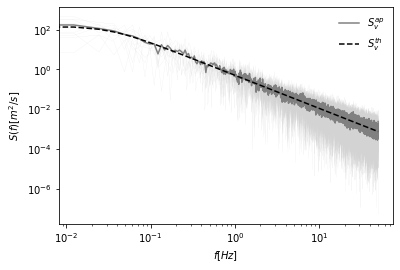

In [28]:
# velocity realizations
v_realizations = beta_realizations+muV
# empirical velocity average
Ev = np.mean(v_realizations,0)
v_fs = np.fft.rfft(v_realizations-Ev,nfft,axis=-1)*dt # real fft
Sv_a = pow(abs(v_fs),2)/dur/2/np.pi # approximated PSD

plt.ion()
plt.loglog(vfq,Sv_a.T,color='lightgrey',linewidth=0.1)
plt.loglog(vfq,np.mean(Sv_a,0),label=r'$S_v^{ap}$',color='grey')
plt.loglog(vfq,Sv(vfq),label=r'$S_v^{th}$',color='black',linestyle='--')
plt.legend(frameon=False)
plt.xlabel(r'$f [Hz]$')
plt.ylabel(r'$S(f) [m^2/s]$')
plt.ioff()

The pressure $p$ applied by the wind on a given surface can be related to the square of the velocity through the formula:

$$ p(t)=\frac{1}{2}\rho_aC_D V^2(t)$$

with $\rho_a$=1.2 kg/m$^3$ being the unit mass density of the air and $C_D$ the drag coefficient.

In [29]:
rho_a = 1.2 # kg/m**3
Cd = 0.8

However, in practice a linearized formula for the pressure field is adopted hereafter.

* Compute the linearized expression of the pressure field, considering small fluctuations $\beta(t)\ll 1$

Answer:   
As $V(t)=\mu_V+\beta(t)$, we can say that $(1+\frac{\beta(t)}{\mu_V})^2 \sim 1+2 \frac{\beta(t)}{\mu_V}$ so we have $p(t)=\frac{1}{2}\rho_a C_D \mu_V^2+\rho_a C_D\mu_V\beta(t)$.

* Compute several samples of the pressure field, evaluate its power spectrum $S_p(f)$ and compare them with the theoretical spectrum:

$$S_p(f)=4\left(\frac{\mu_p}{\mu_V}\right)^2 S_V(f)$$

where $\mu_p$ is the mean pressure.

_Nota bene_: compute the empirical average $\mu_p$.

Answer: 

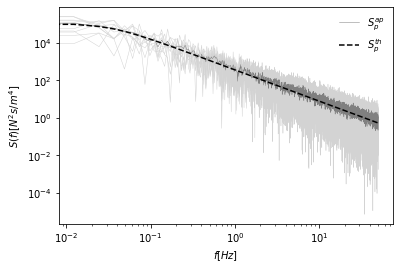

In [31]:
# Mean pressure field
mup = 1/2*rho_a*Cd*muV**2

# theoretical PSD
Sp_t = lambda f: 4*(mup/muV)**2*Sv(f)

# pressure field
p_realizations = 1/2*rho_a*Cd*pow(v_realizations,2)
# empirical pressure average
Ep = np.mean(p_realizations,0)
p_fs = np.fft.rfft(p_realizations-Ep,nfft,axis=-1)*dt # real fft
Sp_a = pow(abs(p_fs),2)/dur/2/np.pi #  approximated PSD


plt.ion()
plt.loglog(vfq,Sp_a.T,color='lightgrey',linewidth=0.5)
plt.loglog(vfq,np.mean(Sp_a,0),label=r'$S_p^{ap}$',color='grey',linewidth=0.5)
plt.loglog(vfq,Sp_t(vfq),label=r'$S_p^{th}$',color='black',linestyle='--')
plt.legend(frameon=False)
plt.xlabel(r'$f [Hz]$')
plt.ylabel(r'$S(f) [N^2s/m^4]$')
plt.ioff()

Considering the MDOF system as a building, with each floor corresponding to a DOF and the height of each floor of $H$= 2 m and width $W$ = 1 m

* Compute the random load (the whole $N_s$ realizations of wind pressure values!) at each floor/dof:

Answer:

In [32]:
Height = 2.0 # m
Hvector = Height*np.array([1.0,2.0,3.0])
W=1.0 #m
MH = M@Hvector

frndm = lambda realization, time:  np.interp(time,vtm,p_realizations[realization,:])

# External force
FextRndm = lambda realization, time: [h*W*frndm(realization, time) for h in Hvector]

* __[NEW!]__ Compute the approximated and theoretical Power Spectral Density of random external force

Answer:

In [41]:
# External force realizations
Fext_realizations = np.empty((Ns,3,ntm))
for r in range(Ns):
    Fext_realizations[r,:,:] = FextRndm(r,vtm)

# Empirical external force average
Ef = np.array([np.mean(Fext_realizations[:,0,:]),np.mean(Fext_realizations[:,1,:]),np.mean(Fext_realizations[:,2,:]),])
Ef = np.tile(np.tile(Ef,(Ns,1)).reshape(Ns,3,1),ntm)
Fext_fs = np.fft.rfft(Fext_realizations-Ef,nfft,axis=-1)*dt # real fft

def compute_Sf(fq,Fext_fs):
    fq_idx = np.argwhere(np.isin(vfq,fq))

    Sf = np.empty((3,3,fq.size,Ns),dtype=np.complex64)
    for k in range(Ns):
        for i in fq_idx:
            fki = Fext_fs[k,:,i].squeeze()
            fkic = np.conjugate(Fext_fs[k,:,i]).squeeze()
            Sf[:,:,i,k] = fki@fkic/dur/2/np.pi
    return np.real(np.mean(Sf,axis=-1))

# approximated PSD
Sf_a = compute_Sf(vfq,Fext_fs)/dur/2/np.pi

# theoretical PSD
Sf_t = lambda f: 4*np.einsum('i,j,k',Hvector,Hvector,Sv(f))

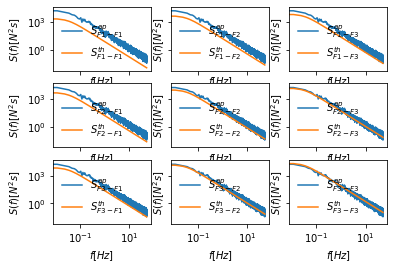

In [42]:
plt.ion()
fig,axs = plt.subplots(3,3,sharex=True,sharey=True)
axs[0,0].loglog(vfq,Sf_a[0,0,:],label=r'$S_{F1-F1}^{ap}$')
axs[0,1].loglog(vfq,Sf_a[0,1,:],label=r'$S_{F1-F2}^{ap}$')
axs[0,2].loglog(vfq,Sf_a[0,2,:],label=r'$S_{F1-F3}^{ap}$')
axs[1,0].loglog(vfq,Sf_a[1,0,:],label=r'$S_{F2-F1}^{ap}$')
axs[1,1].loglog(vfq,Sf_a[1,1,:],label=r'$S_{F2-F2}^{ap}$')
axs[1,2].loglog(vfq,Sf_a[1,2,:],label=r'$S_{F2-F3}^{ap}$')
axs[2,0].loglog(vfq,Sf_a[2,0,:],label=r'$S_{F3-F1}^{ap}$')
axs[2,1].loglog(vfq,Sf_a[2,1,:],label=r'$S_{F3-F2}^{ap}$')
axs[2,2].loglog(vfq,Sf_a[2,2,:],label=r'$S_{F3-F3}^{ap}$')

axs[0,0].loglog(vfq,Sf_t(vfq)[0,0,:],label=r'$S_{F1-F1}^{th}$')
axs[0,1].loglog(vfq,Sf_t(vfq)[0,1,:],label=r'$S_{F1-F2}^{th}$')
axs[0,2].loglog(vfq,Sf_t(vfq)[0,2,:],label=r'$S_{F1-F3}^{th}$')
axs[1,0].loglog(vfq,Sf_t(vfq)[1,0,:],label=r'$S_{F2-F1}^{th}$')
axs[1,1].loglog(vfq,Sf_t(vfq)[1,1,:],label=r'$S_{F2-F2}^{th}$')
axs[1,2].loglog(vfq,Sf_t(vfq)[1,2,:],label=r'$S_{F2-F3}^{th}$')
axs[2,0].loglog(vfq,Sf_t(vfq)[2,0,:],label=r'$S_{F3-F1}^{th}$')
axs[2,1].loglog(vfq,Sf_t(vfq)[2,1,:],label=r'$S_{F3-F2}^{th}$')
axs[2,2].loglog(vfq,Sf_t(vfq)[2,2,:],label=r'$S_{F3-F3}^{th}$')

for ax in axs.reshape(-1):
    ax.legend(frameon=False)
    ax.set_xlabel(r'$f [Hz]$')
    ax.set_ylabel(r'$S(f) [N^2s]$')


plt.ioff()

* __[NEW!]__ Compute the amplitudes $\alpha_n$ for `frdm` for all the $N_S$ realizations 

_Nota bene_: use `solve2ndOrderODE`!

Answer:

In [43]:
# Initial conditions
y0 = np.zeros((1,))
z0 = np.zeros((1,))
X0 = np.concatenate([y0,z0])

def solve2ndOrderODE(t,X,n,xi,i):
    # with extra arguments args:
    # n = number of mode
    # xi = damping coefficient
    phin = evecs[n] # n-th eigen mode
    mn = mM[n]
    omegan = np.sqrt(phin.T @ K @ phin/mn) # n-th natural pulsation
    fn = lambda s: phin@FextRndm(i,s) #np.tensordot(phin,Fext(s),axes=1)/np.sqrt(mn)
    return np.array([X[1],-2*omegan*xi*X[1]-omegan**2*X[0]+fn(t)])

AlphaRndm = np.empty((Ns,3,ntm))
AlphaDotRndm = np.empty((Ns,3,ntm))
uRndm = np.empty((Ns,3,ntm))
vRndm = np.empty((Ns,3,ntm))

for r in range(Ns):
    alpha1Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(0,0.02,r))
    alpha2Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(1,0.02,r))
    alpha3Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(2,0.02,r))

    # Modal amplitudes (displacement)
    AlphaRndm[r,:,:] = np.vstack([alpha1Rndm.y[0,:],alpha2Rndm.y[0,:],alpha3Rndm.y[0,:]])

    # Displacement
    uRndm[r,:,:] = np.einsum('i,j->ij',evecs[0],alpha1Rndm.y[0,:])+np.einsum('i,j',evecs[1],alpha2Rndm.y[0,:])+np.einsum('i,j',evecs[2],alpha3Rndm.y[0,:])

    # Modal amplitudes (velocity)
    AlphaDotRndm[r,:,:] = np.vstack([alpha1Rndm.y[1,:],alpha2Rndm.y[1,:],alpha3Rndm.y[1,:]])

    # Velocity
    vRndm[r,:,:] = np.einsum('i,j->ij',evecs[0],alpha1Rndm.y[1,:])+np.einsum('i,j',evecs[1],alpha2Rndm.y[1,:])+np.einsum('i,j',evecs[2],alpha3Rndm.y[1,:])

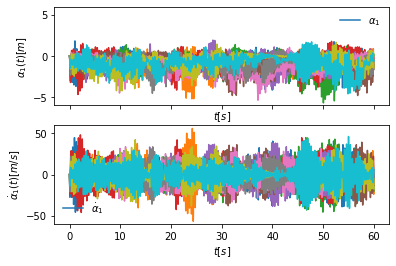

In [44]:
plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(vtm,AlphaRndm[:,0,:].squeeze().T)
axs[0].legend([r'$\alpha_1$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$\alpha_1(t) [m]$')
axs[0].set_ylim(-6,6)

axs[1].plot(vtm,AlphaDotRndm[:,0,:].squeeze().T)
axs[1].legend([r'$\dot{\alpha}_1$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{\alpha}_1(t) [m/s]$')
axs[1].set_ylim(-60.0,60.0)

plt.ioff()

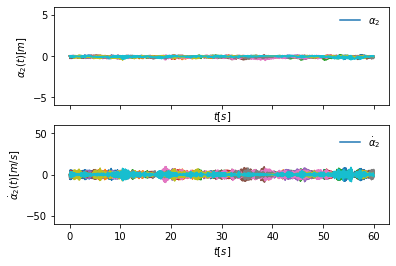

In [45]:
plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(vtm,AlphaRndm[:,1,:].squeeze().T)
axs[0].legend([r'$\alpha_2$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$\alpha_2(t) [m]$')
axs[0].set_ylim(-6,6)

axs[1].plot(vtm,AlphaDotRndm[:,1,:].squeeze().T)
axs[1].legend([r'$\dot{\alpha}_2$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{\alpha}_2(t) [m/s]$')
axs[1].set_ylim(-60.0,60.0)

plt.ioff()

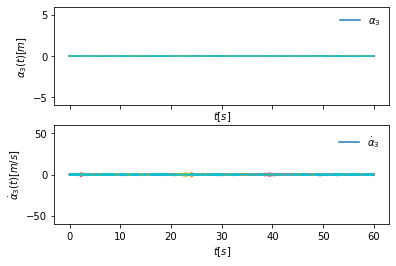

In [46]:
plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(vtm,AlphaRndm[:,2,:].squeeze().T)
axs[0].legend([r'$\alpha_3$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$\alpha_3(t) [m]$')
axs[0].set_ylim(-6,6)

axs[1].plot(vtm,AlphaDotRndm[:,2,:].squeeze().T)
axs[1].legend([r'$\dot{\alpha}_3$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{\alpha}_3(t) [m/s]$')
axs[1].set_ylim(-60.0,60.0)

plt.ioff()

* __[NEW!]__ Plot the average Power Spectral Density $\boldsymbol{S}_u$ for the each dof and the theoretical one (use the theoretical $FRF$ computed above!)

Answer:

In [47]:
# Conjugate transpose Transfer function
HcT = np.transpose(np.conjugate(H),(0,2,1))

def compute_Su(fq,Sf):
    fq_idx = np.argwhere(np.isin(vfq,fq))

    Su = np.empty((3,3,fq.size),dtype=np.complex64)
    for i in fq_idx:
        Su[:,:,i] = H[i,:,:]@HcT[i,:,:]@Sf[:,:,i]
    return np.real(Su)

Su_a = compute_Su(vfq,Sf_a)
Su_t = compute_Su(vfq,Sf_t(vfq))

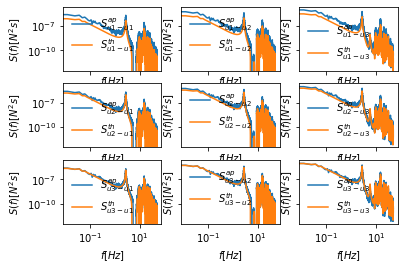

In [48]:
plt.ion()
fig,axs = plt.subplots(3,3,sharex=True,sharey=True)
axs[0,0].loglog(vfq,Su_a[0,0,:],label=r'$S_{u1-u1}^{ap}$')
axs[0,1].loglog(vfq,Su_a[0,1,:],label=r'$S_{u1-u2}^{ap}$')
axs[0,2].loglog(vfq,Su_a[0,2,:],label=r'$S_{u1-u3}^{ap}$')
axs[1,0].loglog(vfq,Su_a[1,0,:],label=r'$S_{u2-u1}^{ap}$')
axs[1,1].loglog(vfq,Su_a[1,1,:],label=r'$S_{u2-u2}^{ap}$')
axs[1,2].loglog(vfq,Su_a[1,2,:],label=r'$S_{u2-u3}^{ap}$')
axs[2,0].loglog(vfq,Su_a[2,0,:],label=r'$S_{u3-u1}^{ap}$')
axs[2,1].loglog(vfq,Su_a[2,1,:],label=r'$S_{u3-u2}^{ap}$')
axs[2,2].loglog(vfq,Su_a[2,2,:],label=r'$S_{u3-u3}^{ap}$')

axs[0,0].loglog(vfq,Su_t[0,0,:],label=r'$S_{u1-u1}^{th}$')
axs[0,1].loglog(vfq,Su_t[0,1,:],label=r'$S_{u1-u2}^{th}$')
axs[0,2].loglog(vfq,Su_t[0,2,:],label=r'$S_{u1-u3}^{th}$')
axs[1,0].loglog(vfq,Su_t[1,0,:],label=r'$S_{u2-u1}^{th}$')
axs[1,1].loglog(vfq,Su_t[1,1,:],label=r'$S_{u2-u2}^{th}$')
axs[1,2].loglog(vfq,Su_t[1,2,:],label=r'$S_{u2-u3}^{th}$')
axs[2,0].loglog(vfq,Su_t[2,0,:],label=r'$S_{u3-u1}^{th}$')
axs[2,1].loglog(vfq,Su_t[2,1,:],label=r'$S_{u3-u2}^{th}$')
axs[2,2].loglog(vfq,Su_t[2,2,:],label=r'$S_{u3-u3}^{th}$')

for ax in axs.reshape(-1):
    ax.legend(frameon=False)
    ax.set_xlabel(r'$f [Hz]$')
    ax.set_ylabel(r'$S(f) [N^2s]$')


plt.ioff()

#### __[TASK 6 -BONUS] Time-marching Integration__  [3/20 points]

<img style='width: 800px; margin: 0px; float: left; border: 10px solid white;' src='images/Newmark_scheme.png'> 

In [49]:
# Newmark coefficients
gamma = 0.5
beta = (gamma+0.5)**2/4

* Compute the Newmark approximation in displacement, velocity and acceleration approaches  ***QUESTION!***

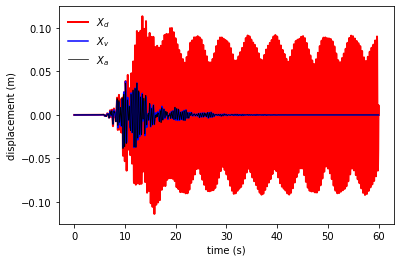

In [51]:
# displacement approach
Ad = (M+beta*dt*dt*K)/(beta*dt*dt)
# velocity approach
Av = (M+beta*dt*dt*K)/(gamma*dt)
# acceleration approach
Aa = (M+beta*dt*dt*K)

# Initialize solutions
Xd = np.zeros((3,ntm+1))
Xv = np.zeros((3,ntm+1))
Xa = np.zeros((3,ntm+1))

Und = np.zeros((3,ntm+1))
Vnd = np.zeros((3,ntm+1))
And = np.zeros((3,ntm+1))

Unv = np.zeros((3,ntm+1))
Vnv = np.zeros((3,ntm+1))
Anv = np.zeros((3,ntm+1))

Una = np.zeros((3,ntm+1))
Vna = np.zeros((3,ntm+1))
Ana = np.zeros((3,ntm+1))

# numerically integrate the EOMs
for n in range(1,ntm):
    # displacement approach
    # prediction
    pUnd = Und[:,n-1]+dt*Vnd[:,n-1]+dt*dt*(1/2-beta)*And[:,n-1]
    pVnd = Vnd[:,n-1]+dt*(1-gamma)*And[:,n-1]
    
    Bdn = Fext(vtm[n])+1/beta/dt/dt*M@pUnd
    Xd = np.linalg.solve(Ad,Bdn)
    Und[:,n] = Xd
    And[:,n] = (Xd-pUnd)/beta/dt/dt
    Vnd[:,n] = (Xd-pUnd)/beta/dt/dt*gamma*dt+pVnd
    
    # velocity approach
    # prediction
    pUnv = Unv[:,n-1]+dt*Vnv[:,n-1]+dt*dt*(1/2-beta)*Anv[:,n-1]
    pVnv = Vnv[:,n-1]+dt*(1-gamma)*Anv[:,n-1]
    
    Bvn = Fext(vtm[n])-K@pUnv+1/gamma/dt*M@pVnv
    Xv = np.linalg.solve(Av,Bvn)
    Vnv[:,n] = Xv
    Anv[:,n] = (Xv-pVnv)/gamma/dt
    Unv[:,n] = (Xv-pVnv)/gamma/dt*beta*dt*dt+pUnv
    
    # acceleration approach
    # prediction
    pUna = Una[:,n-1]+dt*Vna[:,n-1]+dt*dt*(1/2-beta)*Ana[:,n-1]
    pVna = Vna[:,n-1]+dt*(1-gamma)*Ana[:,n-1]
    Ban = Fext(vtm[n])-K@pUnv
    Xa = np.linalg.solve(Aa,Ban)
    Ana[:,n] = Xa
    Vna[:,n] = pVna+gamma*dt*Xa
    Una[:,n] = pUna+beta*dt*dt*Xa

# plot results
#time = [round(t,5) for t in np.arange(0, end_time, time_step) ]
plt.plot(vtm,Und[0,1:],color='red',linewidth=2)
plt.plot(vtm,Unv[0,1:],color='blue',linewidth=1.5)
plt.plot(vtm,Una[0,1:],color='black',linewidth=0.7)

plt.xlabel('time (s)')
plt.ylabel('displacement (m)')
plt.legend([r'$X_d$', r'$X_v$', r'$X_a$'],frameon=False)
plt.show()

### References
P. Le Tallec (2000) *Introduction à la dynamique des structures*. In *Les cours de l'Ecole Polytechnique* 220 pages.
(https://www.amazon.fr/Introduction-dynamique-structures-Patrick-Tallec/dp/2729879943)

J.H. Argyris, H.-P. Mlejnek (1991) *Dynamics of Structures*. ELSEVIER SCIENCE & TECHNOLOGY